# Boston House Price Prediction

         Algorithms we will use are: 1] Linear Regression 2] Random Forest

         Exploring features of the dataset

         1] CRIM : PER CAPITA CRIME RATE BY TOWN 
         2] ZN : PROPORTIONAL OF RESIDENTIAL LAND ZONED FOR LOTS OVER 25,000 SQ.FT 
         3] INDUS : PROPORTION OF NON RETAIL BUSINESS PER TOWN 
         4] CHAS : CHARLES RIVER(CATEGORICAL FEATURE) 
         5] NOX : NITRIC OXIDE CONCENTRATION 
         6] RM : AVERAGE NUMBER OF ROOMS PER DEWELLING 
         7] AGE : PROPORTION OF OWNER OCCUPIED UNITS BUILT PRIOR TO 1940 
         8] DIS : DISTANCE OF 5 BOSTON EMPLOYMENT CENTRES 
         9] RAD : INDEX ACCESSIBILITY TO RADIAL HIGHWAYS 
         10] TAX : FULL PROPERTY TAX RATE PER 10,000 DOLLARS 
         11] PTRATIO : PUPIL-TEACHER RATIO BY TOWN 
         12] LSTAT : LOWER STATUS OF POPULATION

# Step 1] : importing the required libraries

In [ ]:
try:
    import warnings
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.datasets import load_boston
    from sklearn.metrics import mean_squared_error
    from sklearn.linear_model import LinearRegression
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import r2_score , mean_squared_error
    warnings.filterwarnings('ignore')
except ModuleNotFoundError as e:
    print(e)

boston = load_boston()
data = list(boston.data)
features = list(boston.feature_names)
print('total features : ',features)

boston_dataset = pd.DataFrame(boston.data , columns = boston.feature_names)
boston_dataset['Price'] = boston.target
boston_dataset.head()

# Step 2] : Exploratry Data Analysis
          
          what exactly to do in EDA?
          
          1] check the dimensions
          2] check for null values
          3] describe your data
          4] detect the outliars
          5] visualize the data 
          6] create dummies for categorical variables
          7] drop unwanted features
          8] check for multi-collinearity
          9] compute mean and variance
          
    in our case our dataset is already clean so no need to perform anything exta
    the code below is enough to perform EDA for boston dataset
          

In [3]:
class EDA:
    
    def dimensions(self,dataset):
        print('rows : ',dataset.shape[0],'columns :',dataset.shape[1])
        
    def description(self,dataset):
        return dataset.describe()
    
    def null_values(self,dataset):
        return dataset.isnull().sum()
    
    def mean_variance(self,dataset):
        for cols in boston_dataset.columns:
            print(cols , ':' , "mean : ",dataset[cols].mean(),"and","variance : ",dataset[cols].var())
            print('------------------')
    
a = EDA()
print('shape of our dataset')
a.dimensions(boston_dataset)
print("************")
print('description of dataset')
x = a.description(boston_dataset)
print(x)
print("************")
print('total null values')
y = a.null_values(boston_dataset)
print(y)
print("************")
print('mean and variance of features')
a.mean_variance(boston_dataset)

shape of our dataset
rows :  506 columns : 14
************
description of dataset
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795

# Visualize the features of the dataset

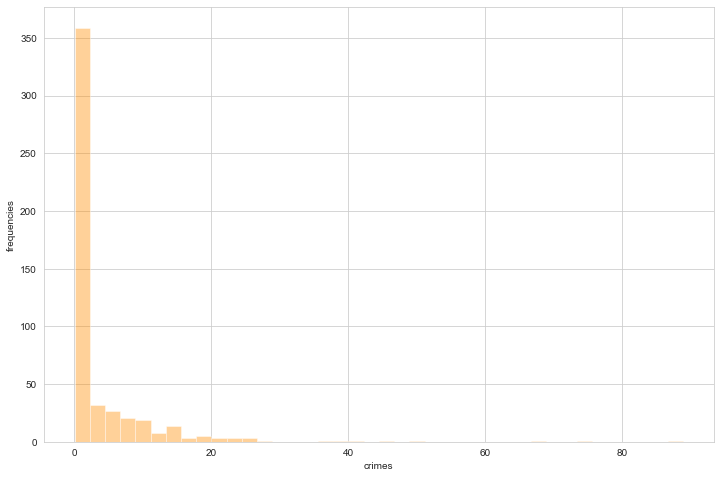

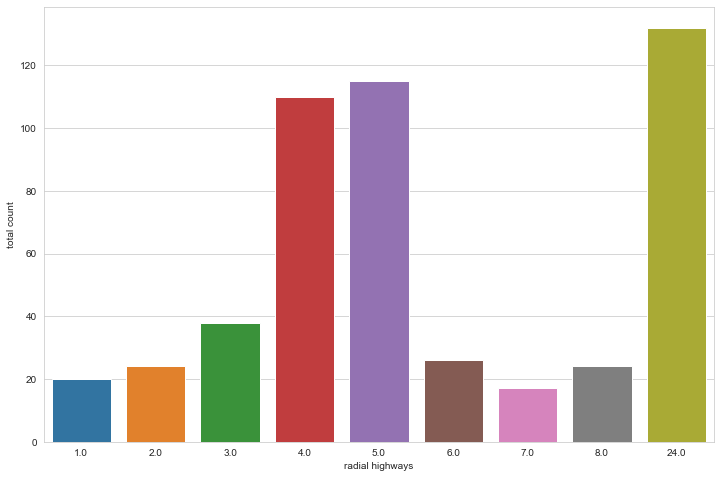

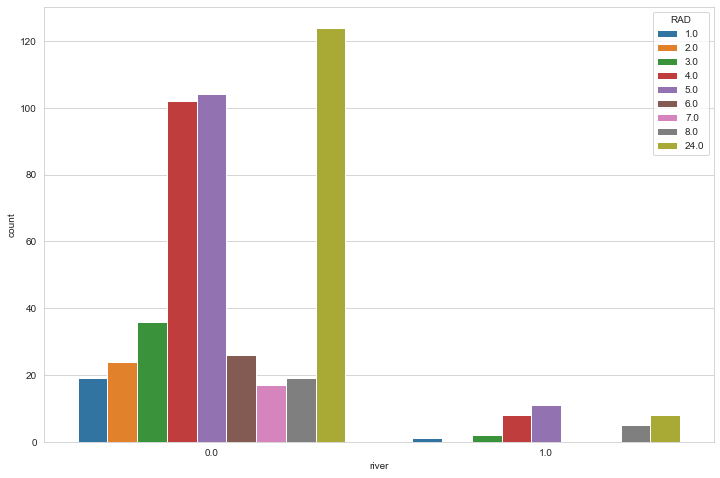

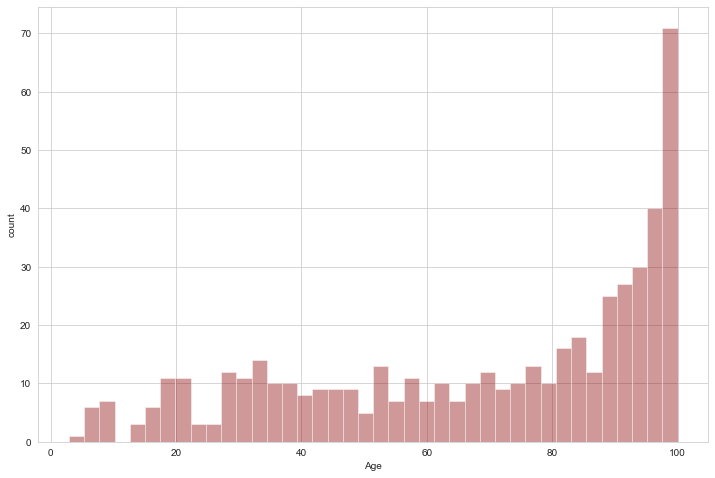

In [5]:
class Visualize:
            
        def crime_rate(self,dataset):
            sns.set_style('whitegrid')
            plt.figure(figsize = (12,8))
            sns.distplot(dataset['CRIM'] , color = 'darkorange',kde = False , bins = 40)
            plt.xlabel('crimes')
            plt.ylabel('frequencies')
            plt.show()
            
        def count_highways(self,dataset):
            plt.figure(figsize = (12,8))
            sns.set_style("whitegrid")
            sns.countplot(x = 'RAD',data = dataset)
            plt.xlabel('radial highways')
            plt.ylabel('total count')
            plt.show()
        
        def highway_with_river(self,dataset):
            plt.figure(figsize = (12,8))
            sns.countplot(x = 'CHAS',hue = 'RAD',data = dataset)
            plt.xlabel('river')
            plt.ylabel('count')
            plt.show()
        
        def analyze_age(self,dataset):
            plt.figure(figsize = (12,8))
            sns.distplot(dataset['AGE'] , kde = False , color = 'darkred',bins = 40)
            plt.xlabel('Age')
            plt.ylabel('count')
            plt.show()
            
v = Visualize()
v.crime_rate(boston_dataset)
print()
v.count_highways(boston_dataset)
print()
v.highway_with_river(boston_dataset)
print()
v.analyze_age(boston_dataset)

# Seprate dependent and independent features

In [6]:
x = boston_dataset.drop('Price',axis = 1)
y = boston_dataset['Price'].astype('int')

# splitting the data for training and testing

In [7]:
train_x , test_x , train_y , test_y = train_test_split(x,y , test_size = 0.33 , random_state = 42)

# Model creation
   
   first we will create a linear regression model and check the score for training and testing

In [8]:
linear_reg = LinearRegression()
class Model:
    
    def liner_regression_training(self):
        linear_reg.fit(train_x,train_y)
        predict_train = linear_reg.predict(train_x)
        print('model fitting with training : ' , r2_score(train_y , predict_train))
        print('error : ',mean_squared_error(train_y , predict_train))

    def liner_regression_testing(self):
        linear_reg.fit(train_x,train_y)
        predict_test = linear_reg.predict(test_x)
        print('model fitting with testing : ' , r2_score(test_y , predict_test))
        print('error : ',mean_squared_error(test_y , predict_test))

m = Model()
m.liner_regression_training()
m.liner_regression_testing()

model fitting with training :  0.7375891290379533
error :  23.416979749556834
model fitting with testing :  0.7260258958934216
error :  20.802738099468982


# Results for linear regression are:
            
            Training score : 73.7 %
            testing score :  72.6%
            
 let us now create our model with random forest and test the accuracy

In [9]:
reg_tree = RandomForestRegressor()
class RFR:
    
    def forest_regressor_train(self):
        reg_tree.fit(train_x,train_y)
        predict_train = reg_tree.predict(train_x)
        print('model fitting with training : ' , r2_score(train_y , predict_train))
        print('error : ',mean_squared_error(train_y , predict_train))
    
    def forest_regressor_test(self):
        reg_tree.fit(train_x,train_y)
        predict_test = reg_tree.predict(test_x)
        print('model fitting with testing : ' , r2_score(test_y , predict_test))
        print('error : ',mean_squared_error(test_y , predict_test))

random_forest = RFR()
random_forest.forest_regressor_train()
random_forest.forest_regressor_test()

model fitting with training :  0.9785033158165406
error :  1.9183176991150444
model fitting with testing :  0.8630137074990556
error :  10.401311377245507


# Result for Random Forest are :
  
                  training accuracy : 97.8%
                  testing accuracy  : 86.3%
                  
  in this way we conclude that Random Forest works better than Linear Regression. You can further use feature selection or 
  HyperParameter optimization techniques for more better results.
           
           